In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

2023-01-19 18:43:40.500307: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 18:43:41.143698: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/zsahildhillon/.local/lib/python3.8/site-packages/cv2/../../lib64:
2023-01-19 18:43:41.143742: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-19 18:43:43.358289: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7';

In [2]:
# pip install tensorflow

In [3]:
# pip install opencv-python

In [4]:
# Implementing ANN from scratch
def init_params(layer_dims):
#     np.random.seed(3)
    params = {}
    for l in range(1, len(layer_dims)):
        params['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        params['b'+str(l)] = np.zeros((layer_dims[l], 1))
        
    return params

# Z (linear hypothesis) - Z = W*X + b , 
# W - weight matrix, b- bias vector, X- Input 
def sigmoid(Z):
    A = 1/(1+np.exp(np.dot(-1, Z)))
    cache = (Z)
    return A, cache


def forward_prop(X, params):
    
    A = X # input to first layer i.e. training data
    caches = []
    L = len(params)//2
    for l in range(1, L+1):
        A_prev = A
        
        # Linear Hypothesis
        Z = np.dot(params['W'+str(l)], A_prev) + params['b'+str(l)] 
        
        # Storing the linear cache
        linear_cache = (A_prev, params['W'+str(l)], params['b'+str(l)]) 
        
        # Applying sigmoid on linear hypothesis
        A, activation_cache = sigmoid(Z) 
        
         # storing the both linear and activation cache
        cache = (linear_cache, activation_cache)
        caches.append(cache)
    
    return A, caches

def cost_function(A, Y):
#     m = Y.shape[1]
    m=1
    
    cost = (-1/m)*(np.dot(np.log(A), Y.T) + np.dot(log(1-A), 1-Y.T)) 
    
    return cost

def one_layer_backward(dA, cache):
    linear_cache, activation_cache = cache
    
    Z = activation_cache
    dZ = dA*sigmoid(Z)*(1-sigmoid(Z)) # The derivative of the sigmoid function
    
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    
    dW = (1/m)*np.dot(dZ, A_prev.T)
    db = (1/m)*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

def backprop(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = -(np.divide(Y, AL) - np.divide(1-Y, 1-AL))
    
    current_cache = caches[L-1]
    grads['dA'+str(L-1)], grads['dW'+str(L-1)], grads['db'+str(L-1)] = one_layer_backward(dAL, current_cache)
    
    for l in reversed(range(L-1)):
        
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = one_layer_backward(grads["dA" + str(l+1)], current_cache)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
    return grads


def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    
    for l in range(L):
        parameters['W'+str(l+1)] = parameters['W'+str(l+1)] -learning_rate*grads['W'+str(l+1)]
        parameters['b'+str(l+1)] = parameters['b'+str(l+1)] -  learning_rate*grads['b'+str(l+1)]
        
    return parameters

def train(X, Y, layer_dims, epochs, lr):
    params = init_params(layer_dims)
    cost_history = []
    
    for i in range(epochs):
        Y_hat, caches = forward_prop(X[0], params)
        cost = cost_function(Y_hat, Y)
        cost_history.append(cost)
        grads = backprop(Y_hat, Y, caches)
        
        params = update_parameters(params, grads, lr)
        
        
    return params, cost_history
print(init_params([784,128,128,10])['W1'])

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [5]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


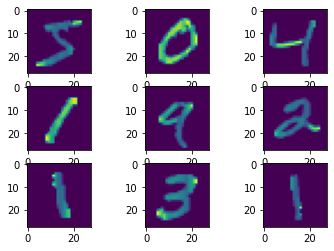

In [6]:
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

In [20]:
model = tf.keras.models.Sequential()

In [21]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))   

In [22]:
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   # 1st hidden layer
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   # 2nd hidden layer

In [23]:
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))   # output layer

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(X_train, y_train, epochs=12, batch_size=100)

Epoch 1/12
  8/600 [..............................] - ETA: 4s - loss: 0.0149 - accuracy: 0.9975

2023-01-19 18:49:47.080744: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


600/600 [==============================] - 4s 7ms/step - loss: 0.0151 - accuracy: 0.9954
Epoch 2/12
600/600 [==============================] - 4s 7ms/step - loss: 0.0118 - accuracy: 0.9963
Epoch 3/12
600/600 [==============================] - 4s 6ms/step - loss: 0.0097 - accuracy: 0.9971
Epoch 4/12
600/600 [==============================] - 4s 6ms/step - loss: 0.0108 - accuracy: 0.9965
Epoch 5/12
600/600 [==============================] - 4s 7ms/step - loss: 0.0088 - accuracy: 0.9971
Epoch 6/12
600/600 [==============================] - 4s 6ms/step - loss: 0.0068 - accuracy: 0.9978
Epoch 7/12
600/600 [==============================] - 4s 7ms/step - loss: 0.0096 - accuracy: 0.9968
Epoch 8/12
600/600 [==============================] - 4s 7ms/step - loss: 0.0057 - accuracy: 0.9983
Epoch 9/12
600/600 [==============================] - 4s 7ms/step - loss: 0.0063 - accuracy: 0.9978
Epoch 10/12
600/600 [==============================] - 4s 7ms/step - loss: 0.0038 - accuracy: 0.9990
Epoch 11/1

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.1340 - accuracy: 0.9751
0.1339513510465622
0.9750999808311462


In [30]:
prediction = model.predict([X_test])
prediction

313/313 [==============================] - 1s 3ms/step


array([[3.28666095e-16, 2.18620940e-15, 2.60410590e-13, ...,
        9.99999940e-01, 5.21224288e-19, 8.85735441e-14],
       [6.33926793e-23, 6.26130311e-12, 9.99999940e-01, ...,
        1.06022381e-21, 3.52699150e-21, 2.49617589e-31],
       [6.18328630e-14, 9.99999583e-01, 1.89618616e-11, ...,
        1.05367903e-07, 9.82565407e-09, 1.07629963e-13],
       ...,
       [2.45946339e-17, 2.67853610e-13, 6.00727347e-18, ...,
        1.55942992e-08, 3.27766209e-14, 3.84557630e-08],
       [3.54516344e-15, 1.13205186e-16, 2.02883873e-15, ...,
        1.03723894e-13, 6.33394075e-06, 8.37002912e-16],
       [1.25091626e-16, 2.05921171e-17, 1.37975566e-16, ...,
        3.64238078e-21, 6.90270723e-18, 2.09155346e-23]], dtype=float32)

Prediction:  7
Prediction:  2
Prediction:  1
Prediction:  0
Prediction:  4
Prediction:  1
Prediction:  4
Prediction:  9
Prediction:  5


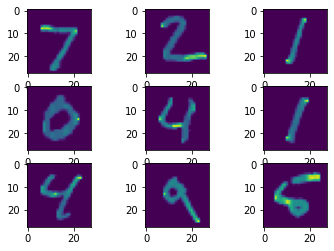

In [37]:
# let us do prediction for single image
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_test[cnt])
         cnt += 1
for i in range(9):
#     print('Probabilities: ', prediction[1])
#     print('\n')
    print('Prediction: ', np.argmax(prediction[i]))
#     plt.imshow(X_test[i])
